In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [2]:
train = pd.read_csv("C:/Users/Abu/Documents/Abu/DataScience/indiaDSclass/Hackathon/Hackathon/MachineHack/Train.csv")
test = pd.read_csv("C:/Users/Abu/Documents/Abu/DataScience/indiaDSclass/Hackathon/Hackathon/MachineHack/Test.csv")

In [3]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [5]:
train.columns.difference(test.columns)

Index(['TARGET(PRICE_IN_LACS)'], dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
POSTED_BY                29451 non-null object
UNDER_CONSTRUCTION       29451 non-null int64
RERA                     29451 non-null int64
BHK_NO.                  29451 non-null int64
BHK_OR_RK                29451 non-null object
SQUARE_FT                29451 non-null float64
READY_TO_MOVE            29451 non-null int64
RESALE                   29451 non-null int64
ADDRESS                  29451 non-null object
LONGITUDE                29451 non-null float64
LATITUDE                 29451 non-null float64
TARGET(PRICE_IN_LACS)    29451 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
train.shape

(29451, 12)

In [8]:
test.shape

(68720, 11)

In [9]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

## combining for easy preprocessing

In [10]:
df_combined = pd.concat([train,test])

C:\Users\Abu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
df_combined["POSTED_BY"].value_counts()

Dealer     60728
Owner      35458
Builder     1985
Name: POSTED_BY, dtype: int64

In [12]:
df_combined.head()

,ADDRESS,BHK_NO.,BHK_OR_RK,LATITUDE,LONGITUDE,POSTED_BY,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION
0,"Ksfc Layout,Bangalore",2,BHK,77.597960,12.969910,Owner,1,0,1,1300.236407,55.0,0
1,"Vishweshwara Nagar,Mysore",2,BHK,76.644605,12.274538,Dealer,1,0,1,1275.000000,51.0,0
2,"Jigani,Bangalore",2,BHK,77.632191,12.778033,Owner,1,0,1,933.159722,43.0,0
3,"Sector-1 Vaishali,Ghaziabad",2,BHK,77.344500,28.642300,Owner,1,1,1,929.921143,62.5,0
4,"New Town,Kolkata",2,BHK,88.484911,22.592200,Dealer,0,0,1,999.009247,60.5,1


In [13]:
df_combined["TARGET(PRICE_IN_LACS)"].isna().sum() # target variable check after combine, it should be null

68720

In [14]:
df_combined["BHK_OR_RK"].isna().sum()

0

In [15]:
df_combined["BHK_OR_RK"].value_counts()

BHK    98089
RK        82
Name: BHK_OR_RK, dtype: int64

In [16]:
df_combined.replace({"BHK_OR_RK":  {"BHK":1,"RK":2}} , inplace = True)

In [17]:
df_combined["BHK_OR_RK"].value_counts()

1    98089
2       82
Name: BHK_OR_RK, dtype: int64

In [18]:
df_combined["BHK_NO."].isna().sum()

0

In [19]:
df_combined["BHK_NO."].isnull().sum()

0

In [20]:
df_combined["POSTED_BY"].value_counts()

Dealer     60728
Owner      35458
Builder     1985
Name: POSTED_BY, dtype: int64

In [21]:
df_combined["POSTED_BY"] = df_combined["POSTED_BY"].astype('category')

In [22]:
df_combined["Posted_by_enc"] = df_combined["POSTED_BY"].cat.codes

In [23]:
df_combined["Posted_by_enc"].value_counts()

1    60728
2    35458
0     1985
Name: Posted_by_enc, dtype: int64

In [24]:
df_combined.head()

,ADDRESS,BHK_NO.,BHK_OR_RK,LATITUDE,LONGITUDE,POSTED_BY,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,Posted_by_enc
0,"Ksfc Layout,Bangalore",2,1,77.597960,12.969910,Owner,1,0,1,1300.236407,55.0,0,2
1,"Vishweshwara Nagar,Mysore",2,1,76.644605,12.274538,Dealer,1,0,1,1275.000000,51.0,0,1
2,"Jigani,Bangalore",2,1,77.632191,12.778033,Owner,1,0,1,933.159722,43.0,0,2
3,"Sector-1 Vaishali,Ghaziabad",2,1,77.344500,28.642300,Owner,1,1,1,929.921143,62.5,0,2
4,"New Town,Kolkata",2,1,88.484911,22.592200,Dealer,0,0,1,999.009247,60.5,1,1


In [25]:
df_combined.isna().sum()

ADDRESS                      0
BHK_NO.                      0
BHK_OR_RK                    0
LATITUDE                     0
LONGITUDE                    0
POSTED_BY                    0
READY_TO_MOVE                0
RERA                         0
RESALE                       0
SQUARE_FT                    0
TARGET(PRICE_IN_LACS)    68720
UNDER_CONSTRUCTION           0
Posted_by_enc                0
dtype: int64

In [26]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98171 entries, 0 to 68719
Data columns (total 13 columns):
ADDRESS                  98171 non-null object
BHK_NO.                  98171 non-null int64
BHK_OR_RK                98171 non-null int64
LATITUDE                 98171 non-null float64
LONGITUDE                98171 non-null float64
POSTED_BY                98171 non-null category
READY_TO_MOVE            98171 non-null int64
RERA                     98171 non-null int64
RESALE                   98171 non-null int64
SQUARE_FT                98171 non-null float64
TARGET(PRICE_IN_LACS)    29451 non-null float64
UNDER_CONSTRUCTION       98171 non-null int64
Posted_by_enc            98171 non-null int8
dtypes: category(1), float64(4), int64(6), int8(1), object(1)
memory usage: 9.2+ MB


## after this either drop irrelvant categorical columns OR use inlcude/exclude style way data type oriented columns to group

In [27]:
df_numeric_columns = df_combined.select_dtypes(include= np.number)

In [28]:
df_category_columns = df_combined.select_dtypes(exclude = np.number)

In [29]:
df_numeric_columns.info()
df_category_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98171 entries, 0 to 68719
Data columns (total 11 columns):
BHK_NO.                  98171 non-null int64
BHK_OR_RK                98171 non-null int64
LATITUDE                 98171 non-null float64
LONGITUDE                98171 non-null float64
READY_TO_MOVE            98171 non-null int64
RERA                     98171 non-null int64
RESALE                   98171 non-null int64
SQUARE_FT                98171 non-null float64
TARGET(PRICE_IN_LACS)    29451 non-null float64
UNDER_CONSTRUCTION       98171 non-null int64
Posted_by_enc            98171 non-null int8
dtypes: float64(4), int64(6), int8(1)
memory usage: 8.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98171 entries, 0 to 68719
Data columns (total 2 columns):
ADDRESS      98171 non-null object
POSTED_BY    98171 non-null category
dtypes: category(1), object(1)
memory usage: 1.6+ MB


In [30]:
df_category_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98171 entries, 0 to 68719
Data columns (total 2 columns):
ADDRESS      98171 non-null object
POSTED_BY    98171 non-null category
dtypes: category(1), object(1)
memory usage: 1.6+ MB


In [31]:
df_numeric_columns.isna().sum()

BHK_NO.                      0
BHK_OR_RK                    0
LATITUDE                     0
LONGITUDE                    0
READY_TO_MOVE                0
RERA                         0
RESALE                       0
SQUARE_FT                    0
TARGET(PRICE_IN_LACS)    68720
UNDER_CONSTRUCTION           0
Posted_by_enc                0
dtype: int64

In [32]:
df_numeric_columns.shape

(98171, 11)

In [33]:
df_test_train = df_numeric_columns

In [34]:
df_test_train.shape

(98171, 11)

In [35]:
df_test_train["Source"] = np.where(df_test_train["TARGET(PRICE_IN_LACS)"].isnull(), "Test","Train" )

C:\Users\Abu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_test_train.head()

,BHK_NO.,BHK_OR_RK,LATITUDE,LONGITUDE,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,Posted_by_enc,Source
0,2,1,77.597960,12.969910,1,0,1,1300.236407,55.0,0,2,Train
1,2,1,76.644605,12.274538,1,0,1,1275.000000,51.0,0,1,Train
2,2,1,77.632191,12.778033,1,0,1,933.159722,43.0,0,2,Train
3,2,1,77.344500,28.642300,1,1,1,929.921143,62.5,0,2,Train
4,2,1,88.484911,22.592200,0,0,1,999.009247,60.5,1,1,Train


In [37]:
df_test_train.shape

(98171, 12)

In [38]:
df_test_train[df_test_train["Source"] == "Train"].shape

(29451, 12)

In [39]:
df_test_train[df_test_train["Source"] == "Test"].shape

(68720, 12)

In [40]:
df_train_preprocessed = df_test_train[df_test_train["Source"] == "Train"]

In [41]:
df_train_preprocessed.shape

(29451, 12)

In [42]:
del df_train_preprocessed["Source"]

In [43]:
df_train_preprocessed.shape

(29451, 11)

In [44]:
df_test_preprocessed = df_test_train[df_test_train["Source"] == "Test"]

In [45]:
df_test_preprocessed.shape

(68720, 12)

In [46]:
del df_test_preprocessed["Source"]

In [47]:
df_test_preprocessed.shape

(68720, 11)

In [48]:
df_train_preprocessed.head()

,BHK_NO.,BHK_OR_RK,LATITUDE,LONGITUDE,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,Posted_by_enc
0,2,1,77.597960,12.969910,1,0,1,1300.236407,55.0,0,2
1,2,1,76.644605,12.274538,1,0,1,1275.000000,51.0,0,1
2,2,1,77.632191,12.778033,1,0,1,933.159722,43.0,0,2
3,2,1,77.344500,28.642300,1,1,1,929.921143,62.5,0,2
4,2,1,88.484911,22.592200,0,0,1,999.009247,60.5,1,1


In [49]:
df_test_preprocessed.head()

,BHK_NO.,BHK_OR_RK,LATITUDE,LONGITUDE,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,TARGET(PRICE_IN_LACS),UNDER_CONSTRUCTION,Posted_by_enc
0,1,1,73.047700,21.262000,1,0,1,545.171340,NaN,0,2
1,2,1,73.148278,18.966114,0,1,0,800.000000,NaN,1,1
2,2,1,88.484911,22.592200,1,0,1,1257.096513,NaN,0,1
3,3,1,75.584600,26.988300,1,0,1,1400.329489,NaN,0,1
4,1,1,72.870000,22.700000,1,0,1,430.477830,NaN,0,2


In [50]:
train_X = df_train_preprocessed.drop(columns = ["LATITUDE","LONGITUDE","TARGET(PRICE_IN_LACS)"])

In [51]:
train_X.shape

(29451, 8)

In [68]:
train_X.head()

,BHK_NO.,BHK_OR_RK,READY_TO_MOVE,RERA,RESALE,SQUARE_FT,UNDER_CONSTRUCTION,Posted_by_enc
0,2,1,1,0,1,1300.236407,0,2
1,2,1,1,0,1,1275.000000,0,1
2,2,1,1,0,1,933.159722,0,2
3,2,1,1,1,1,929.921143,0,2
4,2,1,0,0,1,999.009247,1,1


In [74]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29451 entries, 0 to 29450
Data columns (total 8 columns):
BHK_NO.               29451 non-null int64
BHK_OR_RK             29451 non-null int64
READY_TO_MOVE         29451 non-null int64
RERA                  29451 non-null int64
RESALE                29451 non-null int64
SQUARE_FT             29451 non-null float64
UNDER_CONSTRUCTION    29451 non-null int64
Posted_by_enc         29451 non-null int8
dtypes: float64(1), int64(6), int8(1)
memory usage: 1.8 MB


In [82]:
train_X["Posted_by_enc"].value_counts()

1    18291
2    10538
0      622
Name: Posted_by_enc, dtype: int64

In [52]:
train_Y = df_train_preprocessed["TARGET(PRICE_IN_LACS)"]

In [53]:
train_Y.shape

(29451,)

In [54]:
test_X = df_test_preprocessed.drop(columns = ["LATITUDE","LONGITUDE","TARGET(PRICE_IN_LACS)"])

In [55]:
test_X.shape

(68720, 8)

In [56]:
def run_model(model,train_x,train_y,test_x):
    model.fit(train_x, train_y)
    pd.Series(model.coef_,index=train_x.columns).plot(kind='bar')
    pred_train = model.predict(train_x)
    pred_test = model.predict(test_x)
    pred_test_abs = abs(test_x)
    print("RMSE of Train = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_x,train_y, cv =10, scoring="neg_root_mean_squared_error")
    print("Cross Validation score = ",np.mean(abs(score)))

In [57]:
model = LinearRegression()
run_model(model,train_X,train_Y,test_X)


RMSE of Train =  580.4772620932886
Cross Validation score =  641.3902295608889


RMSE of Train =  600.914973745783
Cross Validation score =  659.5777956965712


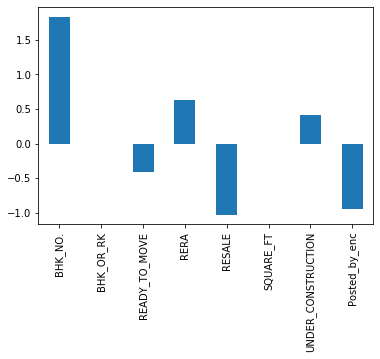

In [58]:
model = Ridge(alpha = 1000000)
run_model(model,train_X,train_Y,test_X)

RMSE of Train =  601.2581822002413
Cross Validation score =  659.8512113638293


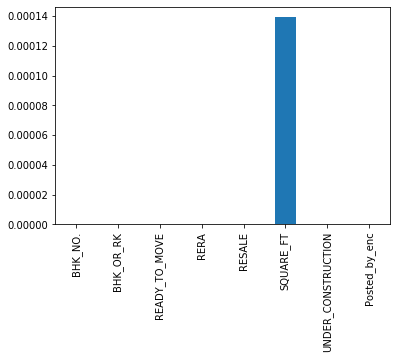

In [59]:
model = Lasso(alpha = 10000)
run_model(model,train_X,train_Y,test_X)

RMSE of Train =  601.2298853850345
Cross Validation score =  659.8438933271282


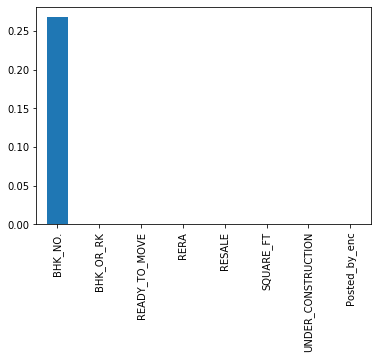

In [60]:
model = ElasticNet(alpha=100, l1_ratio=0.5)
run_model(model,train_X,train_Y,test_X)

## Pickle model as a file using joblib

In [61]:
import joblib
import pickle

In [62]:
joblib.dump(model,'C:/Users/Abu/Documents/Abu/DataScience/indiaDSclass/Model Deployment/HousePredictDeploymentLocal/HousePredictPickle.pkl')

['C:/Users/Abu/Documents/Abu/DataScience/indiaDSclass/Model Deployment/HousePredictDeploymentLocal/HousePredictPickle.pkl']

In [63]:
LR_HousePrediction_model = joblib.load('HousePredictPickle.pkl')

In [64]:
pred_train_value = LR_HousePrediction_model.predict(train_X)

In [65]:
pred_test_value = LR_HousePrediction_model.predict(test_X)

In [66]:
pred_test_value

array([139.84667598, 140.15005417, 140.21364563, ..., 144.41227701,
       140.20204471, 140.64607299])

In [67]:
print("RMSE of Train = ",np.sqrt(mean_squared_error(train_Y, pred_train_value)))

RMSE of Train =  601.2298853850345
